In [1]:
from dike_model_function import DikeNetwork
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import MultiprocessingEvaluator, ema_logging
import pickle

In [2]:
model, _ = get_model_for_problem_formulation(2)

In [3]:
ema_logging.log_to_stderr(ema_logging.INFO)

n_scenarios = 1000 #In assignment 5 is at first 1000 used and later on for the dimensional stacking 10000. 
n_policies = 8 #Not sure if we have to go for 8 again here like in the earlier exploratory modeling

use_pickle1 = False
if use_pickle1:
    with open('data/PRIM_results1.pickle','rb') as filehandler:
        results = pickle.load(filehandler)
else:
    with MultiprocessingEvaluator(model,n_processes=10) as evaluator:
        results = evaluator.perform_experiments(n_scenarios, n_policies)
    
    with open('data/PRIM_results1.pickle',"wb") as filehandler:
        pickle.dump(results,filehandler)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 8 policies * 1 model(s) = 8000 experiments
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 1600 cases completed
[MainProcess/INFO] 2400 cases completed
[MainProcess/INFO] 3200 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 4800 cases completed
[MainProcess/INFO] 5600 cases completed
[MainProcess/INFO] 6400 cases completed
[MainProcess/INFO] 7200 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [4]:
experiments, outcomes = results

In [6]:
cleaned_experiments = experiments.drop(labels=[l.name for l in model.levers], axis=1)

In [7]:
import numpy as np

data = outcomes['Expected Number of Deaths']
y = data < np.percentile(data, 95) #Not sure which percentile we need to use

In [8]:
#threshold (float) – the density threshold that a box has to meet
#Not sure which tresholds we need to use?
prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8, peel_alpha=0.005) 
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 8000 points remaining, containing 7600 cases of interest
C:\Users\Thomas\miniconda3\lib\site-packages\ema_workbench\analysis\prim.py:742: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.peeling_trajectory = self.peeling_trajectory.append(
C:\Users\Thomas\miniconda3\lib\site-packages\ema_workbench\analysis\prim.py:742: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.peeling_trajectory = self.peeling_trajectory.append(
C:\Users\Thomas\miniconda3\lib\site-packages\ema_workbench\analysis\prim.py:742: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.peeling_trajectory = self.peeling_trajectory.append(
C:\Users\Thomas\minicond

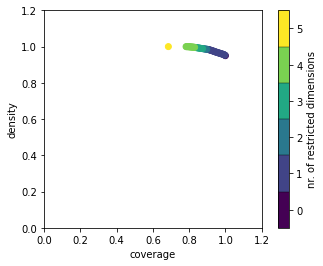

In [9]:
box1.show_tradeoff()
plt.show()

coverage    0.685263
density          1.0
id                55
mass           0.651
mean             1.0
res_dim            5
Name: 55, dtype: object

                          box 55                         \
                             min                    max   
A.3_pfail               0.163906               0.999841   
A.2_pfail               0.074873               0.999787   
A.1_pfail               0.005878               0.999009   
A.5_pfail               0.040088               0.999627   
policy     {1, 2, 3, 4, 5, 6, 7}  {1, 2, 3, 4, 5, 6, 7}   

                                          
                               qp values  
A.3_pfail  [3.442677247379843e-46, -1.0]  
A.2_pfail  [4.344203645787812e-21, -1.0]  
A.1_pfail   [0.018683208242470384, -1.0]  
A.5_pfail     [0.3833330257054687, -1.0]  
policy       [0.41683137605299364, -1.0]  



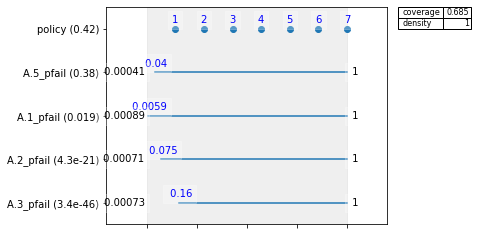

In [10]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

In [12]:
from ema_workbench.analysis import dimensional_stacking

[MainProcess/INFO] model dropped from analysis because only a single category


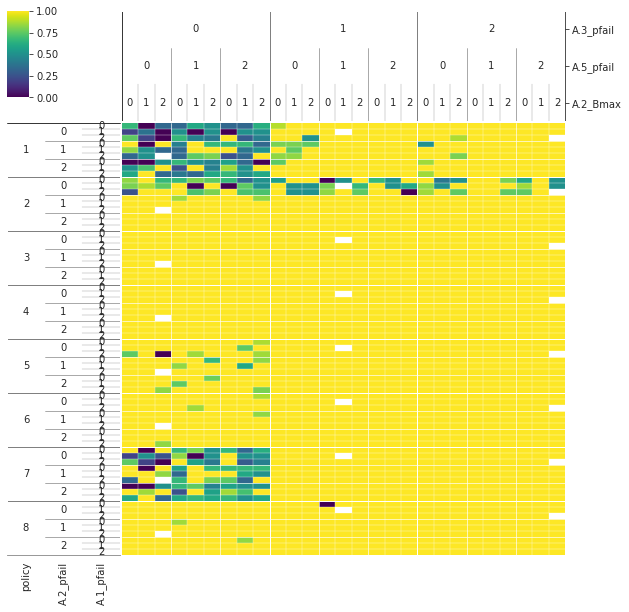

In [13]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)
plt.show()